# Model Optimization

Hyperparameter optimization in machine learning intends to find the hyperparameters of a given machine learning algorithm that deliver the best performance as measured on a validation set.

Hyperparameters, in contrast to model parameters, are set by the program before training.

To skip to [Model Optimization](#optimize).

Data Set - https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Table of Content

1. **[Header Files](#lib)**
2. **[About Data Set](#about)**
3. **[Data Preparation](#prep)**
    - 3.1 - **[Read Data](#read)**
    - 3.2 - **[Analysing Missing Values](#miss)**
    - 3.3 - **[Train Test Split](#train)**
    - 3.4 - **[Checking Balancing](#balance)**
    - 3.5 - **[Score Card to update models](#score)**      
4. **[Model](#model)**
5. **[Model Optimization](#optimize)**
    - 5.1 - **[Grid Search CV](#grid)**
    - 5.2 - **[Randomized Search CV](#random)** 
6. **[Comparing Grid Search CV and Random Search CV](#compare)**   

    

<a id="lib"></a>
## 1. Import Libraries

In [61]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

<a id="about"></a>
## 2. About the Dataset

<a id="prep"></a>
## 3. Data Preperation

<a id="read"></a>
## 3.1 Read Data

In [62]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<a id="miss"></a>
## 3.2 Analysing Missing Values

In [63]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<a id="train"></a>
## 3.3 Train Test Split

In [64]:
X=df.drop('DEATH_EVENT',axis=1)
y=df['DEATH_EVENT']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(209, 12) (90, 12) (209,) (90,)


<a id="balance"></a>
## 3.4 Checking Balancing

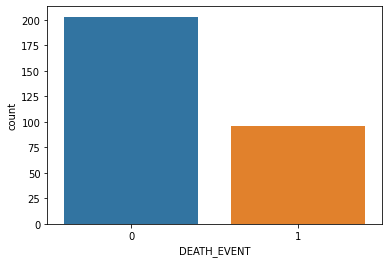

In [66]:
sns.countplot(x=y)
plt.show()

In [67]:
smote = SMOTE(random_state=42)
X_sm, Y_sm = smote.fit_resample(X_train, y_train)
Y_sm.value_counts()

0    150
1    150
Name: DEATH_EVENT, dtype: int64

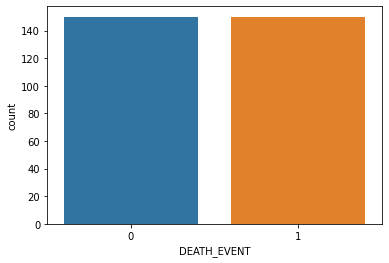

In [68]:
sns.countplot(x=Y_sm)
plt.show()

<a id="score"></a>
## 3.5 Score Card to update models

In [69]:
score_card = pd.DataFrame(columns=['Model Name', 'Train Accuracy Score', 'Test Accuracy Score', 'Precision Score', 'Recall Score', 'Kappa Score','f1-Score','AUC Score'])

def update_scorecard(y_test,y_test_pred,model_name):
    
    global score_card
    
    mlr_model_metrics = pd.Series({
                     'Model Name' : model_name,
                        'Train Accuracy Score': metrics.accuracy_score(y_train, y_train_pred),
                        'Test Accuracy Score': metrics.accuracy_score(y_test, y_test_pred),
                        'Precision Score': metrics.precision_score(y_test, y_test_pred),
                        'Recall Score': metrics.recall_score(y_test, y_test_pred),
                        'Kappa Score':metrics.cohen_kappa_score(y_test, y_test_pred),
                        'f1-Score': metrics.f1_score(y_test, y_test_pred), 
                        'AUC Score' : metrics.roc_auc_score(y_test, y_test_pred)
                   })

    # append our result table using append()
    score_card = score_card.append(mlr_model_metrics, ignore_index=True)

#   print the result table
#   score_card
    
    

<a id="model"></a>
## 4.Model

In [70]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

y_train_pred=xgb_model.predict(X_train)
y_test_pred=xgb_model.predict(X_test)

[17:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [71]:
update_scorecard(y_test,y_test_pred,'XG Boost Classifier')
score_card

,Model Name,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,XG Boost Classifier,0.976077,0.788889,0.846154,0.594595,0.543513,0.698413,0.759561


<a id="optimize"></a>
## 5. Model Optimization

In [72]:
tuned_parameters=tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}


<a id="grid"></a>
### 5.1 Grid Search CV

The parameters of the estimator used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [73]:
best_params={'gamma': 0, 'learning_rate': 0.6, 'max_depth': 6}
best_params

{'gamma': 0, 'learning_rate': 0.6, 'max_depth': 6}

In [74]:
xgb_model = XGBClassifier(**best_params)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

y_train_pred=xgb_model.predict(X_train)
y_test_pred=xgb_model.predict(X_test)

[17:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [75]:
update_scorecard(y_test,y_test_pred,'XG Boost Classifier Grid Search CV')
score_card

,Model Name,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,XG Boost Classifier,0.976077,0.788889,0.846154,0.594595,0.543513,0.698413,0.759561
1,XG Boost Classifier Grid Search CV,1.000000,0.788889,0.821429,0.621622,0.547380,0.707692,0.763641


<a id="random"></a>
### 5.2 Randomized Search CV

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

In [76]:
tuned_parameters=tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

In [77]:
from datetime import datetime
start_time = datetime.now()

##do your work here
xgb_model = XGBClassifier()
rsearch = RandomizedSearchCV(xgb_model,param_distributions=tuned_parameters,n_iter=5,
                             scoring='roc_auc',cv=10,random_state=4)


rsearch.fit(X_train,y_train)
print(rsearch.best_params_)

end_time = datetime.now()
duration=end_time - start_time
print('Duration: {}'.format(duration))

[17:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[17:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [78]:
best_params={'max_depth': 3, 'learning_rate': 0.2, 'gamma': 2}
best_params


{'max_depth': 3, 'learning_rate': 0.2, 'gamma': 2}

In [79]:
xgb_model = XGBClassifier(**best_params)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

y_train_pred=xgb_model.predict(X_train)
y_test_pred=xgb_model.predict(X_test)


[17:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [80]:
update_scorecard(y_test,y_test_pred,'XG Boost Classifier Random Search CV')
score_card

,Model Name,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
0,XG Boost Classifier,0.976077,0.788889,0.846154,0.594595,0.543513,0.698413,0.759561
1,XG Boost Classifier Grid Search CV,1.000000,0.788889,0.821429,0.621622,0.547380,0.707692,0.763641
2,XG Boost Classifier Random Search CV,0.933014,0.744444,0.769231,0.540541,0.447411,0.634921,0.713666


In [81]:
# best_params={'gamma': 0, 'learning_rate': 0.6, 'max_depth': 6}
# best_params

# xgb_model = XGBClassifier()

# # fit the model using fit() on train data
# xgb_model.fit(X_sm, Y_sm)

# y_train_pred=xgb_model.predict(X_train)
# y_test_pred=xgb_model.predict(X_test)

# update_scorecard(y_test,y_test_pred,'XG Boost Classifier Random Search CV')
# score_card

<a id="compare"></a>
## 6. Comparing Grid Search CV and Random Search CV

### Comparison 1

#### Note : 
Grid Search CV takes longer than Random search CV to execute . This even after being a fairly small data set takes a lot of time to run that is where Random Search CV performes better.

### Comparison 2

In [82]:
score_card.iloc[1:]

,Model Name,Train Accuracy Score,Test Accuracy Score,Precision Score,Recall Score,Kappa Score,f1-Score,AUC Score
1,XG Boost Classifier Grid Search CV,1.000000,0.788889,0.821429,0.621622,0.547380,0.707692,0.763641
2,XG Boost Classifier Random Search CV,0.933014,0.744444,0.769231,0.540541,0.447411,0.634921,0.713666


#### Note :
Grid Search CV provides fairly better results